In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("data_for_predictions.csv")

In [5]:
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [7]:
df.dtypes

Unnamed: 0                                      int64
id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema        int64
channel_usilxuppasemubllopkaafesmlibmsdf        int64
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
origin_up_ldkssxwpmemidmecebumciepifcamkci      int64
origin_up_lxidpiddsbxsbosboudacockeimpuepw      int64
Length: 64, dtype: object

In [10]:
df=df.drop(["Unnamed: 0","id"],axis=1)

In [11]:
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [13]:
x=df.drop("churn",axis=1)
y=df["churn"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clss=RandomForestClassifier()

In [16]:
clss.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
predict=clss.predict(x_test)

In [19]:
con=confusion_matrix(y_test,predict)
con

array([[2668,    4],
       [ 230,   20]])

In [20]:
acc=accuracy_score(y_test,predict)
acc

0.919917864476386

In [21]:
class_report=classification_report(y_test,predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2672
           1       0.83      0.08      0.15       250

    accuracy                           0.92      2922
   macro avg       0.88      0.54      0.55      2922
weighted avg       0.91      0.92      0.89      2922



In [24]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': clss.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

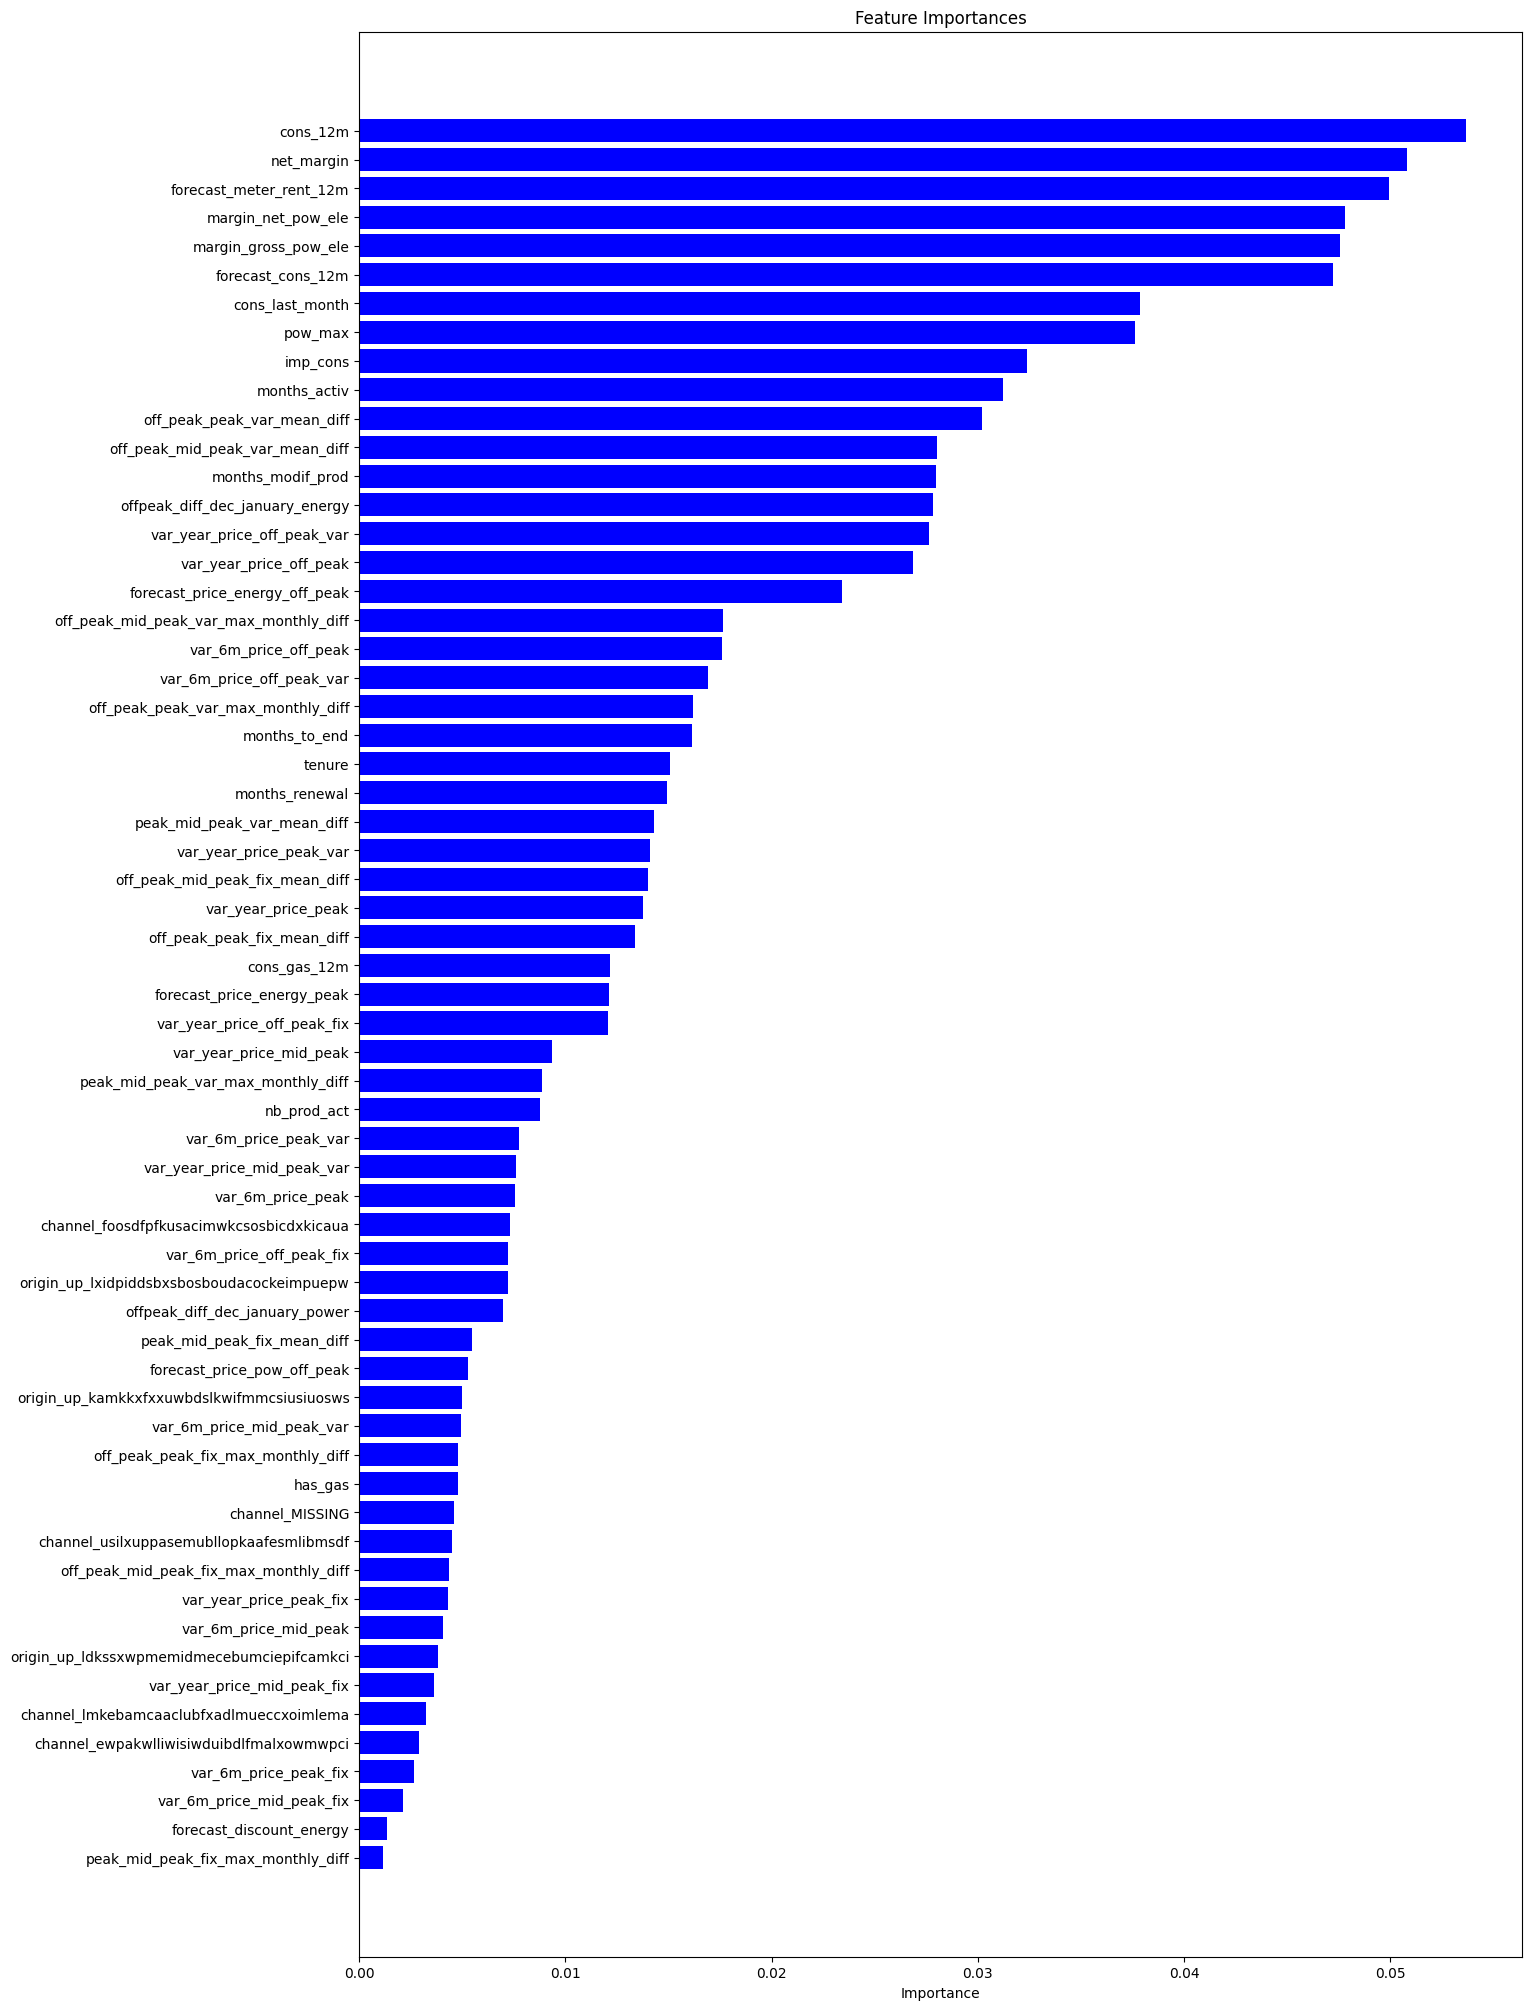

In [25]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()